In [1]:
import pandas as pd
import numpy as np
import zipfile
#import warnings
#warnings.simplefilter("ignore")
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [6]:
#df = pd.read_csv("data/jane-street-market-prediction.zip", compression="zip")
##train = pd.read_csv("../input/jane-street-market-prediction/train.csv",nrows=10000)

zf = zipfile.ZipFile('data/jane-street-market-prediction.zip') 
#df_train = pd.read_csv(zf.open('train.csv'))

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [2]:
#Function to Reduce dataset size
#Referencia: 
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name

        if col_type not in ['object', 'category', 'datetime64[ns, UTC]']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [20]:
import datatable as dt
df_train = (
    #dt.fread('../input/jane-street-market-prediction/train.csv')
    dt.fread(zf.open('train.csv'))
      .to_pandas()
      #.query('weight > 0')
      .pipe(reduce_mem_usage)
)

Memory usage of dataframe is 2489.49 MB
Memory usage after optimization is: 633.77 MB
Decreased by 74.5%


In [12]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 2516.84 MB
Memory usage after optimization is: 633.77 MB
Decreased by 74.8%


In [13]:
df_train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009918,0.014076,0.008774,0.001390,0.006271,1,-1.873047,-2.191406,...,NaN,1.167969,8.312500,1.782227,14.015625,2.652344,12.601562,2.300781,11.445312,0
1,0,16.671875,-0.002829,-0.003227,-0.007320,-0.011116,-0.009789,-1,-1.349609,-1.705078,...,NaN,-1.178711,1.777344,-0.915527,2.832031,-1.416992,2.296875,-1.304688,1.898438,1
2,0,0.000000,0.025131,0.027603,0.033417,0.034393,0.023972,-1,0.812988,-0.256104,...,NaN,6.117188,9.664062,5.542969,11.671875,7.281250,10.062500,6.636719,9.429688,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003201,-1,1.174805,0.344727,...,NaN,2.837891,0.499268,3.033203,1.513672,4.398438,1.265625,3.855469,1.013672,3
4,0,0.138550,0.001252,0.002165,-0.001216,-0.006218,-0.002604,1,-3.171875,-3.093750,...,NaN,0.344971,4.101562,0.614258,6.625000,0.800293,5.234375,0.362549,3.925781,4


In [14]:
df_train.shape

(2390491, 138)

## Data exploration 
Reference: https://www.kaggle.com/muhammadmelsherbini/jane-street-extensive-eda

### Preprocesing

In [19]:
#Select the last hundred thousand rows to check how the model works
size = 100000
dftrain = df_train.tail(size)

In [20]:
#Save is df and then work with it directly
dftrain.to_csv('data/df_tail_slice.csv')

In [102]:
df = pd.read_csv('data/df_tail_slice.csv', index_col=0)

In [103]:
df.tail()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489
2390490,499,0.000000,-0.001855,-0.001855,-0.001194,-0.000864,-0.001905,-1,-1.817184,-1.131577,...,-0.571013,2.483421,8.284037,-0.698486,0.199953,-0.168395,2.051091,1.726072,5.823676,2390490


In [29]:
#Select the properties
features = [c for c in df.columns if 'feature' in c]
features[:10]

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9']

In [104]:
#Calculate the target variable. It will be 1 when resp > 0 and 0 when resp < 0
#Referencia: https://www.kaggle.com/iamleonie/utility-function-and-patterns-in-missing-values
df['action'] = (df['resp'] > 0).astype('int')
df.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
2290491,481,0.974771,-0.038032,-0.055168,-0.076930,-0.100109,-0.091656,1,7.442965,4.500442,...,4.439683,0.170712,3.232478,-0.755341,4.415958,-0.605848,4.112801,-0.420223,2290491,0
2290492,481,0.208154,0.001497,0.000770,-0.001708,-0.021468,-0.017945,1,0.809714,0.383915,...,0.248170,-0.809252,0.270006,-0.802743,0.401035,-0.634366,0.221224,-0.852937,2290492,0
2290493,481,0.412978,0.009129,0.007264,0.013256,0.019940,0.015581,1,0.698454,-0.723749,...,1.215396,-1.399202,1.458320,-1.303910,2.174994,-0.900339,1.446174,-1.272786,2290493,1
2290494,481,0.000000,-0.025545,-0.047143,-0.065203,-0.087996,-0.081261,1,-0.253299,-1.379947,...,2.104834,-1.747039,3.212726,-0.860813,4.244496,-0.795992,3.030925,-1.262928,2290494,0
2290495,481,0.000000,0.000831,0.002342,0.004093,0.006966,0.006498,-1,-2.404892,-2.244246,...,-1.813594,0.556395,-1.769834,-0.688174,-3.020030,-0.374692,-2.239718,0.294721,2290495,1


In [105]:
df.shape

(100000, 139)

In [106]:
# Delete cases when weight is equal to 0
df = df.loc[df.weight != 0]
df.shape

(84554, 139)

In [107]:
#Select alone with the features
df1 = pd.concat([df.weight, df[features], df.action], axis=1)
df1.head()

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,action
2290491,0.974771,1,7.442965,4.500442,-5.340775,-3.364080,-3.664409,-2.229316,-11.472932,-8.152712,...,1.330784,4.439683,0.170712,3.232478,-0.755341,4.415958,-0.605848,4.112801,-0.420223,0
2290492,0.208154,1,0.809714,0.383915,-1.360565,-1.069115,-1.599888,-1.342275,-0.599203,-0.638618,...,-0.702404,0.248170,-0.809252,0.270006,-0.802743,0.401035,-0.634366,0.221224,-0.852937,0
2290493,0.412978,1,0.698454,-0.723749,3.887865,2.202352,2.676793,1.469995,-0.201681,-0.352827,...,-1.494729,1.215396,-1.399202,1.458320,-1.303910,2.174994,-0.900339,1.446174,-1.272786,1
2290496,4.701026,-1,-0.108725,-0.098245,-0.584870,-0.531834,0.113378,0.104781,-0.358784,-0.428619,...,0.743873,1.786197,2.655315,0.338060,0.578215,1.309802,1.541863,1.925124,2.417085,0
2290497,0.767006,-1,-3.172026,-3.093182,-4.102813,-2.097025,-2.256208,-1.061316,-0.076776,-0.311537,...,-0.574013,0.227322,-0.745897,0.498644,0.043705,0.501972,-0.373742,-0.119813,-1.241104,0


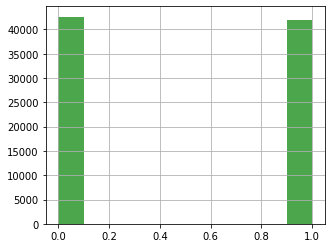

In [15]:
#Note if the target variable is unbalanced
df1["action"].hist(figsize = (5, 4), color='g', alpha= 0.7);

The dataset has a very balanced target variable

In [109]:
#Check null values
df1.isnull().sum().sum()

212843

In [21]:
#Check which rows Nan have
nan_rows = df1[df1.isnull().T.any()]
nan_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12824 entries, 2291172 to 2388654
Columns: 131 entries, feature_0 to action
dtypes: float64(129), int64(2)
memory usage: 12.9 MB


## Approach the best model with PyCaret (AutoML)

In [4]:
import time
start_time = time.time()

from pycaret.classification import *
exp = setup(df1, target = 'action')

print("--- %s minutes ---" % ((time.time() - start_time)/60))

Setup Succesfully Completed!


,Description,Value
0,session_id,1594
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(84554, 131)"
4,Missing Values,True
5,Numeric Features,129
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


NameError: name 'main' is not defined

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.6455,0.7133,0.6087,0.6529,0.6300,0.2906,0.2912,5.2442
1,CatBoost Classifier,0.6335,0.6956,0.6248,0.6319,0.6283,0.2668,0.2668,32.7670
2,Extreme Gradient Boosting,0.6139,0.6663,0.6082,0.6112,0.6097,0.2276,0.2276,18.3858
3,Light Gradient Boosting Machine,0.6121,0.6684,0.6067,0.6094,0.6080,0.2241,0.2241,1.4134
4,Decision Tree Classifier,0.6021,0.6021,0.6006,0.5985,0.5995,0.2042,0.2043,13.9913
5,K Neighbors Classifier,0.5895,0.6250,0.5869,0.5859,0.5864,0.1789,0.1789,2.0685
6,Random Forest Classifier,0.5811,0.6202,0.4636,0.6005,0.5233,0.1605,0.1648,1.8555
7,Gradient Boosting Classifier,0.5652,0.6005,0.5568,0.5621,0.5594,0.1302,0.1302,175.0402
8,Ridge Classifier,0.5405,0.0000,0.5158,0.5382,0.5268,0.0807,0.0808,0.1545
9,Linear Discriminant Analysis,0.5405,0.5569,0.5157,0.5382,0.5267,0.0806,0.0807,1.1138


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1594, verbose=0,
                     warm_start=False)

### Repeat the approximation with multicolinearity removal, reduction of dimensionality and filling null values

In [112]:
start_time = time.time()

exp2 = setup(df1, target = 'action', feature_selection = True, feature_selection_threshold=0.8,
             remove_multicollinearity=True, multicollinearity_threshold=0.8, numeric_imputation='zero')
#We keep 20% of the best variables
#And we eliminated multicolinearity between independent variables

print("--- %s minutes ---" % ((time.time() - start_time)/60))

Setup Succesfully Completed!


,Description,Value
0,session_id,7870
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(84554, 132)"
4,Missing Values,True
5,Numeric Features,130
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


--- 0.6601736068725585 minutes ---


In [113]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.6898,0.7742,0.6653,0.6958,0.6802,0.3792,0.3797,2.0917
1,CatBoost Classifier,0.6392,0.7037,0.6377,0.6358,0.6367,0.2784,0.2784,17.4795
2,Random Forest Classifier,0.6316,0.6898,0.5303,0.6600,0.5880,0.2620,0.2671,0.8085
3,Decision Tree Classifier,0.6275,0.6275,0.6218,0.6250,0.6234,0.2550,0.2550,1.7786
4,Extreme Gradient Boosting,0.6183,0.6733,0.6149,0.6152,0.6150,0.2365,0.2365,3.6844
5,Light Gradient Boosting Machine,0.6111,0.6684,0.6203,0.6052,0.6126,0.2222,0.2224,0.3926
6,K Neighbors Classifier,0.5868,0.6228,0.5840,0.5833,0.5836,0.1735,0.1736,0.3172
7,Gradient Boosting Classifier,0.5617,0.5940,0.5632,0.5575,0.5603,0.1234,0.1235,26.8834
8,Ada Boost Classifier,0.5380,0.5539,0.5158,0.5356,0.5253,0.0757,0.0758,5.4565
9,Logistic Regression,0.5317,0.5451,0.5065,0.5291,0.5175,0.0631,0.0631,0.1769


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7870, verbose=0,
                     warm_start=False)

In [114]:
#Creat the best performance model given by Extra Trees Classifier
etc_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6919,0.7754,0.6617,0.7002,0.6804,0.3834,0.3840
1,0.7007,0.7852,0.6776,0.7068,0.6919,0.4012,0.4016
2,0.6864,0.7713,0.6789,0.6856,0.6822,0.3727,0.3727
3,0.6796,0.7700,0.6495,0.6872,0.6678,0.3589,0.3594
4,0.6936,0.7746,0.6627,0.7025,0.6820,0.3868,0.3874
5,0.6811,0.7636,0.6469,0.6905,0.6680,0.3618,0.3625
6,0.6906,0.7754,0.6644,0.6974,0.6805,0.3809,0.3813
7,0.6887,0.7740,0.6687,0.6929,0.6805,0.3772,0.3774
8,0.6900,0.7725,0.6789,0.6906,0.6847,0.3798,0.3799
9,0.6950,0.7798,0.6640,0.7042,0.6835,0.3897,0.3904


In [28]:
#Try to improve the choice of hyperparameters to optimize performance
tuned_etc_model = tune_model(etc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5086,0.5368,0.0224,0.6301,0.0432,0.0095,0.0359
1,0.5086,0.5301,0.0258,0.6092,0.0495,0.0096,0.0332
2,0.5132,0.5263,0.0326,0.6979,0.0623,0.0189,0.0622
3,0.5122,0.5299,0.0389,0.6299,0.0734,0.0166,0.0477
4,0.5093,0.5261,0.0419,0.5695,0.0780,0.0108,0.0287
5,0.5192,0.5387,0.1485,0.5566,0.2344,0.0324,0.0475
6,0.5057,0.5178,0.0463,0.5163,0.0849,0.0037,0.0089
7,0.5066,0.5310,0.0438,0.5294,0.0809,0.0056,0.0139
8,0.5117,0.5164,0.2123,0.5184,0.3012,0.0185,0.0229
9,0.5100,0.5249,0.1957,0.5154,0.2837,0.0148,0.0189


It seems that parameter optimization results in a loss of performance. Although optimization is a better generalization of the model.    
We continue to use the model without parameter optimization

In [115]:
#Predict the model with the testset generated in the Pycaret model and check for overfitting
etc_model_pred = predict_model(etc_model)
#Good performance is perceived in the PyCaret testset

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6949,0.7823,0.6687,0.7019,0.6849,0.3895,0.3899


In [116]:
etc_model_pred.head()

,feature_49,feature_43,feature_60,feature_86,feature_41,feature_72,feature_95,feature_27,feature_83,feature_6,...,feature_125,weight,feature_45,feature_57,feature_7,feature_121,feature_61,action,Label,Score
0,-0.257891,-2.844099,-1.176444,-0.646639,0.678036,0.198916,-0.654842,-0.391896,1.105291,-0.309798,...,2.890584,1.955040,-0.214074,-0.295435,-0.193575,1.775561,-0.986118,1,1,0.58
1,-0.275785,-0.869495,-1.748488,-0.590322,1.414941,-0.839911,1.683757,0.295685,-2.408513,-1.000476,...,-0.043092,3.778388,0.296241,0.437455,-1.219757,-0.567699,-1.476724,0,0,0.46
2,-0.811153,3.335490,-0.234322,1.588108,-0.588012,2.785174,3.587410,-1.832041,-0.593987,-0.769392,...,-1.254349,0.100661,3.141302,1.045407,-1.572582,-0.663986,-0.203905,1,1,0.64
3,1.071377,-1.478763,1.031896,1.674911,-0.244521,0.556097,-1.376217,-2.118798,0.660392,-2.138970,...,0.856117,2.134529,-0.925228,-0.388015,-1.762993,0.529679,0.905290,0,0,0.39
4,-0.418189,-2.536106,0.847526,-0.144011,3.693458,0.092914,0.727708,0.111564,1.161330,-1.126969,...,-2.696278,7.121219,0.712113,-0.329467,-0.727098,-2.216757,0.737638,1,1,0.71


In [117]:
#Save the model for testing with another slider from the original dataset of a similar size
etc_final = finalize_model(etc_model);

#### Check the Overfit of the model with another sample

In [40]:
#Extract the first 100,000 records and measure the performance of the saved model
zf = zipfile.ZipFile('data/jane-street-market-prediction.zip') 
df_test = pd.read_csv(zf.open('train.csv'))

In [41]:
#We extract the first 100,000 rows
size = 100000
df_test = df_test.head(size)

In [44]:
print('Dataset size:', df_test.shape)
Nan= df_test.isnull().sum().sum()
print('Null values:', Nan)

Tamaño del dataset: (100000, 138)
Nulos: 253665


In [45]:
#Fill the nan with 0 and check
df_test.fillna(0,inplace=True)

Nan= df_test.isnull().sum().sum()
print('Nulos:', Nan)

Nulos: 0


In [47]:
#Calculate the target variable. It will be 1 when resp > 0 and 0 when resp < 0
df_test['action'] = (df_test['resp'] > 0).astype('int')
df_test.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,1
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2,1
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0


In [48]:
# Delete cases when weight is equal to 0
df_test = df_test.loc[df_test.weight != 0]
df_test.shape

(77759, 139)

In [51]:
#Select model variables (features only)
features = [c for c in df_test.columns if 'feature' in c]
df_test = pd.concat([df_test[features],df_test.action], axis=1)
df_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,action
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,0.0,0.0,-0.151877,...,0.0,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,0.0,0.0,2.683018,...,0.0,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0
6,-1,-3.172026,-3.093182,-0.030588,-0.043175,0.097058,0.053483,0.0,0.0,-6.299415,...,0.0,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,1
7,-1,0.446050,-0.466210,0.498751,0.244116,0.412528,0.224140,0.0,0.0,0.277257,...,0.0,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,1
8,1,-3.172026,-3.093182,-0.363836,-0.291496,0.128422,0.096168,0.0,0.0,-3.727364,...,0.0,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,0


In [67]:
#Reindexed to keep numbers in a row
df_test.reset_index(drop=True, inplace=True)

In [71]:
df_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,action
0,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,0.0,0.0,-0.151877,...,0.0,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0
1,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,0.0,0.0,2.683018,...,0.0,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0
2,-1,-3.172026,-3.093182,-0.030588,-0.043175,0.097058,0.053483,0.0,0.0,-6.299415,...,0.0,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,1
3,-1,0.446050,-0.466210,0.498751,0.244116,0.412528,0.224140,0.0,0.0,0.277257,...,0.0,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,1
4,1,-3.172026,-3.093182,-0.363836,-0.291496,0.128422,0.096168,0.0,0.0,-3.727364,...,0.0,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,0


In [58]:
df_test.shape

(77759, 131)

In [72]:
y_test = df_test['action']

y_pred_test = predict_model(etc_final, data = df_test)
y_pred_test = y_pred_test['Label']
y_pred_test = pd.to_numeric(y_pred_onu)

In [73]:
y_test.shape

(77759,)

In [74]:
y_pred_test.shape
#y_pred_test.dtype

(77759,)

In [15]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print("La matriz de confusión es ")
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

La matriz de confusión es 
[[18338 18984]
 [18873 21564]]
Precisión: 0.5131496032613588
Exactitud: 0.5318141461970998
Exhaustividad: 0.5332739817493879
F1: 0.5325430635302834
AUC: 0.5123097844013003


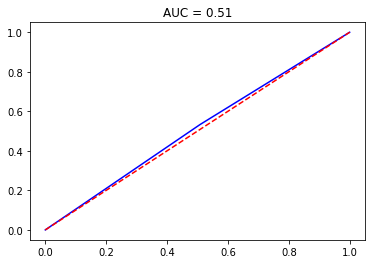

In [89]:
metricas_modelos(y_test, y_pred_test)

We see that in this case the model overfits when using another slide in the dataset.  
- Model training with the last 100,000 rows: Accuracy=0.6832 
- Testing the model with the first 100,000 rows: Accuracy=0.5123

### We test whether the saved model works with example_test.csv

In [119]:
zf = zipfile.ZipFile('data/jane-street-market-prediction.zip') 
test = pd.read_csv(zf.open('example_test.csv'))
test.head()

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
0,0.000000,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,0
1,16.673515,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0,1
2,0.000000,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,0,2
3,0.000000,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,0,3
4,0.138531,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0,4


In [135]:
prediction = predict_model(etc_final, data = test)
prediction

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id,Label,Score
0,0.000000,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,...,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,0,0,0.43
1,16.673515,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,...,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0,1,1,0.63
2,0.000000,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,...,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,0,2,1,0.62
3,0.000000,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,...,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,0,3,0,0.41
4,0.138531,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,...,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0,4,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,0.000000,1,-1.213240,-1.557117,0.530793,0.382429,0.316811,0.240976,0.741902,0.680989,...,0.525934,1.242721,1.977483,2.563083,1.857149,2.424928,2,15214,1,0.53
15215,0.000000,1,-0.413328,-0.642504,0.429951,0.333967,-0.728263,-0.637617,0.204294,0.138052,...,-0.101824,3.804838,1.780150,7.504901,4.702145,15.376130,2,15215,1,0.55
15216,0.000000,1,-1.378947,-1.702976,0.548763,0.396754,0.328203,0.249898,0.784458,0.730435,...,0.527251,1.245219,1.981606,2.567519,1.876328,2.450874,2,15216,1,0.55
15217,0.000000,1,-0.324708,-1.089962,-0.873900,-0.544143,-1.265208,-0.844335,2.302628,1.978776,...,0.310616,2.660067,3.052869,6.399390,5.396259,10.972647,2,15217,0,0.46


In [168]:
#prediction = predict_model(etc_final, data = test)
#sample_prediction_df = pd.DataFrame([prediction.Label], columns=['action'], index=prediction.ts_id)
sample_prediction_df = pd.concat([prediction.Label], axis=1, keys=prediction.ts_id)
sample_prediction_df.rename(columns={ sample_prediction_df.columns[0]: "action" }, inplace=True)
#sample_prediction_df.rename(columns={'0':'action'}, inplace = True)
sample_prediction_df.head()

ts_id,action
0,0
1,1
2,1
3,0
4,0


In [169]:
sample_prediction_df.dtypes

ts_id
action    int64
dtype: object

**Explore Alternatives**:  
- The Nan Values instead of filling them with 0, fill them with a linear interpolation (since it is a series of time) or with the mean.  
- Delete features with more than 10% null values 
- Eliminate high linelinearity by hand with Variance Inflation Factor (VIF) 
- Test the recurrent neural network (LSTM) model that takes the environment into account in time series.
- Test the LSTM with the "resp" instead of the "features".

## Creamos el modelo Extra Trees Classifier seleccionado

In [132]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [101]:
import warnings
#warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [207]:
%%time

# Load data
#Extract the first 100,000 rows
zf = zipfile.ZipFile('data/jane-street-market-prediction.zip') 
df_train = pd.read_csv(zf.open('train.csv'), nrows=200000)

Wall time: 8.71 s


In [24]:
#df_train.info()

In [208]:
##PREPROCESING##

# Drop rows with 'weight'=0 
df_train = df_train[df_train['weight']!=0]
#df_train = df_train.loc[df_train.weight != 0]

# Create 'action' column (target)
# The objetive is maximise the utility function pi=∑j(weightij∗respij∗actionij) where positive values of resp will increase pi
#df_train['action'] = df_train['resp'].apply(lambda x:x>0).astype(int)
df_train['action'] = (df_train['resp'] > 0).astype('int')

#Select the model´s variables (features alone)
features = [c for c in df_train.columns if 'feature' in c]
#df_train = pd.concat([df_train[features],df_train.action], axis=1)

X = df_train[features]
y = df_train['action']

In [104]:
# Train and test data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [105]:
#First estrategy
#Fill nan values with 0
train_x.fillna(0,inplace=True)
test_x.fillna(0,inplace=True)

#Second estrategy
#Fill nan values with median
#train_median = train_x.median()
#train_x = train_x.fillna(train_median)
#test_x = test_x.fillna(train_median)

#Third estrategy
#Lineal Interpolation
#train_x.interpolate(method='linear', inplace=True)

In [106]:
train_x.isnull().sum().sum()

0

In [107]:
#Comprobamos que hemos eliminado el resto de valores nulos e infinitos
train_x.replace([np.inf, -np.inf], np.nan, inplace=True)

In [108]:
#Nos cercioramos que los valores son numéricos
train_x.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [109]:
# define the model from PyCaret Optimization
etc = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7870, verbose=0,
                     warm_start=False)

La matriz de confusión es 
[[26212     0]
 [    0 28219]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


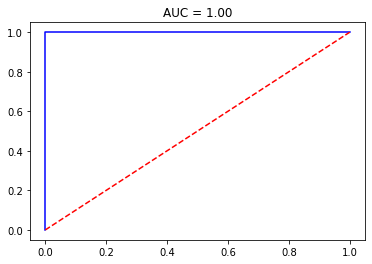

In [110]:
etc.fit(train_x, train_y)
y_pred = etc.predict(train_x)

metricas_modelos(train_y, y_pred)

La matriz de confusión es 
[[7219 3891]
 [3415 8803]]
Precisión: 0.6868141289437586
Exactitud: 0.6934772333385851
Exhaustividad: 0.7204943525945326
F1: 0.7067276814386642
AUC: 0.6851346650461411


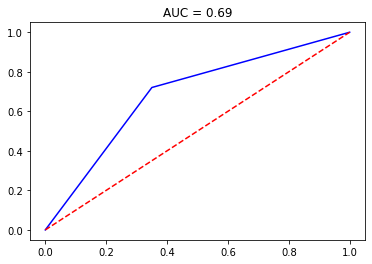

In [111]:
#Vemos si hay sobreajuste
y_pred_test = etc.predict(test_x)
metricas_modelos(test_y, y_pred_test)

Vemos que hay **sobreajuste** por tanto lo intentamos con una **validación cruzada** y todos los registros.  

### Validación Cruzada  
Nota: En este caso un error típico es utilizar los conjuntos de datos de entrenamiento separados previamente. Dado que la validación cruzada ya realiza la separación de los datos en la cantidad de conjuntos indicada y valida con datos que no ha visto el modelo se han de **usar todos los datos**.

In [209]:
#Preprocessing
#Fill inf values with nan
X.replace([np.inf, -np.inf], np.nan, inplace=True)
#Fill nan values with 0
X.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [113]:
%%time
# evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(etc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.703 (0.006)
Wall time: 5min 2s


La matriz de confusión es 
[[17572 19750]
 [16665 23772]]
Precisión: 0.531694080427989
Exactitud: 0.5462065162446579
Exhaustividad: 0.5878774389791528
F1: 0.56627639681273
AUC: 0.5293494691814472


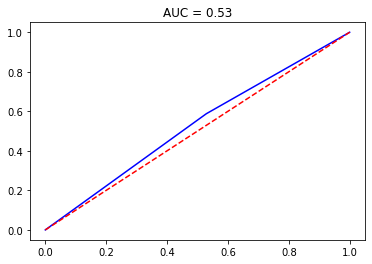

In [118]:
#Representamos la Precisión accuracy y el AUC sobre las 100.000 filas del dataframe
y_pred_cv = cross_val_predict(etc,
                         X,
                         y,
                         cv = 10)

metricas_modelos(y, y_pred_cv)

In [119]:
print(train_x.shape)
print(test_x.shape)

(54431, 130)
(23328, 130)


La matriz de confusión es 
[[16850  9362]
 [ 8051 20168]]
Precisión: 0.6800903896676527
Exactitud: 0.6829664747714189
Exhaustividad: 0.7146957723519615
F1: 0.6984709691942718
AUC: 0.6787655574715705


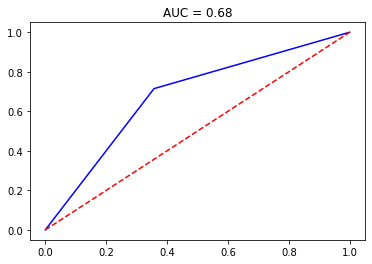

In [122]:
#Representamos la Precisión accuracy y el AUC sobre las 54.431 filas del train df
y_pred_cv = cross_val_predict(etc,
                         train_x,
                         train_y,
                         cv = 10)

metricas_modelos(train_y, y_pred_cv)

La matriz de confusión es 
[[6316 4794]
 [3800 8418]]
Precisión: 0.6316015089163237
Exactitud: 0.6371480472297911
Exhaustividad: 0.6889834670158782
F1: 0.6620526936688951
AUC: 0.6287401583504234


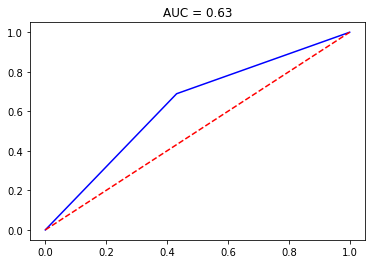

In [121]:
#Probamos el rendimiento sobre la selección del test df (23.328 registros)
y_pred_cv = cross_val_predict(etc,
                         test_x,
                         test_y,
                         cv = 10)

metricas_modelos(test_y, y_pred_cv)


Optimizamos los parámetros del modelo con validación cruzada desde `GridSearchCV`

In [ ]:
#Parámetros originales  del modelo
etc = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7870, verbose=0,
                     warm_start=False)

In [123]:
%%time

import warnings
#warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

#model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
#                            min_samples_leaf=35, max_features=150)

cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(
    estimator=etc,
    param_grid={
        'criterion': ['entropy'],#['gini', 'entropy'], #grid.best_params_ = {'criterion': 'entropy'}
        'n_estimators': [100],#range(25,125,25),#grid.best_params_ = {'n_estimators': 100}
        'max_depth': [100], #range(1,100,25),#grid.best_params_ = {'max_depth': 100}
        'max_features': [100],#range(50,150,50),#grid.best_params_ = {'n_estimators': 100}
        #'min_samples_leaf': range(1,50,5),#grid.best_params_ = {'min_samples_leaf': 1}
        #'min_samples_split': range(1,50,5),
    },
    #scoring='r2',
    cv=cv2
        
)

grid.fit(X, y)
print(u'El rendimiento el modelo es: %0.5f' % grid.score(X, y))

El rendimiento el modelo es: 1.00000
Wall time: 32min 57s


In [191]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.762):
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 100, 'n_estimators': 100}


In [125]:
print(u'El rendimiento el modelo es: %0.5f' % grid.best_score_)

El rendimiento el modelo es: 0.76218


In [126]:
%%time

model_et = ExtraTreesClassifier(**grid.best_params_)

model_et.fit(X, y)

Wall time: 3min 49s


ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features=100)

### Automatizamos el proceso con Pipeline

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77759 entries, 1 to 99999
Columns: 130 entries, feature_0 to feature_129
dtypes: float64(129), int64(1)
memory usage: 77.7 MB


In [128]:
#transformaciones que aplicamos a las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#En el caso de querer seleccionar un tipo determinado de Columna
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = X.select_dtypes(include=['object']).drop(['action'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])
        #('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)])

In [129]:
%%time

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model_et)])

#pipe = Pipeline([('model', model)])

pipe.fit(X, y)

pipe.score(test_x, test_y)
print(u'El rendimiento el modelo es: %0.5f' % pipe.score(X, y))

El rendimiento el modelo es: 1.00000
Wall time: 3min 53s


La matriz de confusión es 
[[26212     0]
 [    0 28219]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


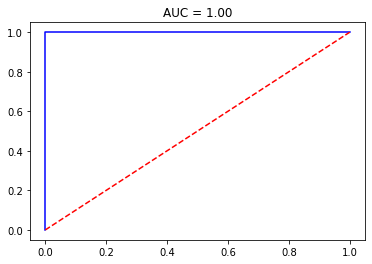

In [130]:
#Probamos con train y test set para ver si existe sobreajuste en el rendimiento del modelo
y_pred = pipe.predict(train_x)

metricas_modelos(train_y, y_pred)

La matriz de confusión es 
[[11110     0]
 [    0 12218]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


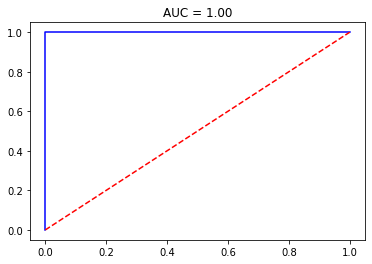

In [131]:
#Vemos si hay sobreajuste en el test df
y_pred_test = pipe.predict(test_x)
metricas_modelos(test_y, y_pred_test)

### Selección de las mejores características

Para poder generalizar el modelo y mejorar los tiempos de procesado podemos introducir como transformador dentro de la Pipeline, un  **selector de las mejores características** `SelectKBest` para comprobar si obtenemos rendimientos parecidos.

In [133]:
X.shape

(77759, 130)

In [134]:
#Probamos cómo quedaría el df con las selección de las 50 características más predictivas 
X_new = SelectKBest(f_classif, k=50).fit_transform(X, y)
X_new.shape

(77759, 50)

In [140]:
#Repetimos para obtener la selección de características. Para eso hay que separar SelectKBest de fit_transform
var_sk = SelectKBest(f_classif, k = 50)
var_sk.fit_transform(X, y)
#var_sk.get_support()

k_selection = X.loc[:, var_sk.get_support()]

In [145]:
k_selection.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_13', 'feature_15', 'feature_17',
       'feature_18', 'feature_19', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_53', 'feature_55', 'feature_57',
       'feature_58', 'feature_59', 'feature_69', 'feature_70', 'feature_71',
       'feature_79', 'feature_103', 'feature_122', 'feature_126',
       'feature_128'],
      dtype='object')

Volvemos a entrenar el modelo con las características seleccionadas

In [148]:
##Ejemplo de transformador numérico y categórico
##Reference = https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
t = [('num', SimpleImputer(strategy='median'), [0, 1]), ('cat', SimpleImputer(strategy='most_frequent'), [2, 3])]
transformer = ColumnTransformer(transformers=t)

In [151]:
select_features = list(k_selection.columns)
t = [('num', SimpleImputer(strategy='median'), select_features), ('scaler', StandardScaler(), select_features)]
transformer = ColumnTransformer(transformers=t)

In [152]:
%%time
pipe = Pipeline(steps=[('transformer', transformer),
                       ('model', model_et)])

#pipe = Pipeline([('model', model)])

pipe.fit(X, y)

pipe.score(test_x, test_y)
print(u'El rendimiento el modelo es: %0.5f' % pipe.score(X, y))

El rendimiento el modelo es: 1.00000
Wall time: 3min 58s


La matriz de confusión es 
[[26212     0]
 [    0 28219]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


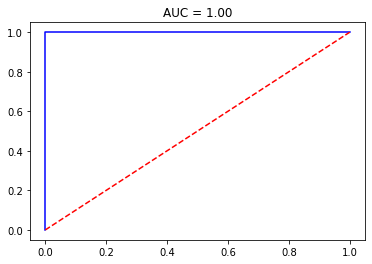

In [153]:
#Probamos con train y test set para ver si existe sobreajuste en el rendimiento del modelo
y_pred = pipe.predict(train_x)

metricas_modelos(train_y, y_pred)

La matriz de confusión es 
[[11110     0]
 [    0 12218]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


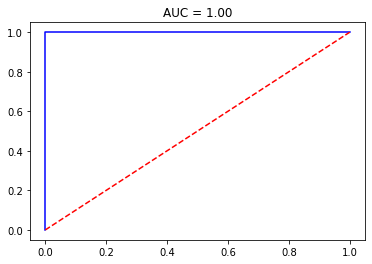

In [154]:
#Vemos si hay sobreajuste en el test df
y_pred_test = pipe.predict(test_x)
metricas_modelos(test_y, y_pred_test)

### Selección de características con PCA  
Reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [181]:
from sklearn.decomposition import PCA, NMF

#Repetimos para obtener la selección de características. Para eso hay que separar SelectKBest de fit_transform
pca_sk = PCA(.90) #Dividir en componentes que expliquen al menos el 90% de la varianza (información)
pca_sk.fit_transform(X, y)
#var_sk.get_support()

#k_selection = X.loc[:, pca_sk.get_support()]
#k_selection.columns
pca_sk.explained_variance_ratio_
#Para explicar el 90% de la varianza se reduce de 130 características a 16 componentes
print('Nº de componentes reducidas para explicar el 90% de la varianza:', len(pca_sk.explained_variance_ratio_))
print('% de reducción', )

Nº de componentes reducidas para explicar el 90% de la varianza: 16


In [182]:
pca = PCA()
pca.get_params().keys()

dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten'])

In [183]:
et = ExtraTreesClassifier()
et.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [185]:
%%time

pca= PCA()
et = ExtraTreesClassifier()

pipe_pca = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('model', et)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': range(4,16,4),
}

search = GridSearchCV(pipe_pca, param_grid=param_grid, n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.519):
{'pca__n_components': 12}
Wall time: 1min 14s


In [210]:
%%time

pca= PCA(n_components=12)
et = ExtraTreesClassifier(criterion='entropy', random_state=0, n_estimators=100)

cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

pipe_pca = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('model', et)])

# Parameters of pipelines can be set using name +‘__’+ parameter names:
param_grid = {
    #'pca__n_components': range(4,16,4),
    #'et__criterion': ['entropy'],#['gini', 'entropy'], #grid.best_params_ = {'criterion': 'entropy'}
    #'n_estimators': [50, 100],#range(25,125,25),#grid.best_params_ = {'n_estimators': 100}
    'model__max_depth': [1, 5, 25, 50], #range(1,100,25),#grid.best_params_ = {'max_depth': 100}
     #'max_features': [100],#range(50,150,50),#grid.best_params_ = {'n_estimators': 100}
     #'min_samples_leaf': range(1,50,5),#grid.best_params_ = {'min_samples_leaf': 1}
     #'min_samples_split': range(1,50,5),
    #'et__random_state': [0]
}

et_pca = GridSearchCV(pipe_pca, param_grid=param_grid, n_jobs=-1, cv=cv2)
et_pca.fit(X, y)
print("Best parameter (CV score=%0.3f):" % et_pca.best_score_)
print(et_pca.best_params_)

Best parameter (CV score=0.578):
{'model__max_depth': 50}
Wall time: 7min 20s


Se ha reducido el tiempo de procesamiento de 3min 58s con el método `BestKselection` con 50 características a 1min 14s con el método `PCA`con 12 componentes.

In [192]:
#Para obtener los parámetros de referencia de los distintos métodos 
grid_red.get_params().keys()
search.get_params().keys()
pipe_pca.get_params().keys()
ExtraTreesClassifier().get_params().keys()
#etc

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

La matriz de confusión es 
[[22547  3665]
 [  278 27941]]
Precisión: 0.9275596626922158
Exactitud: 0.8840410048724926
Exhaustividad: 0.9901484815195436
F1: 0.9340910990388633
AUC: 0.9251635128488913


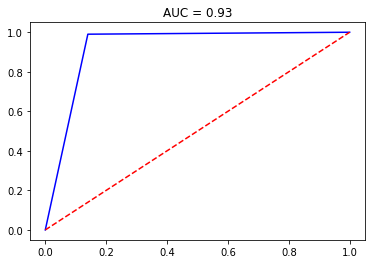

In [203]:
#Probamos con train y test set para ver si existe sobreajuste en el rendimiento del modelo
y_pred = et_pca.predict(train_x)

metricas_modelos(train_y, y_pred)

La matriz de confusión es 
[[ 9548  1562]
 [  143 12075]]
Precisión: 0.926911865569273
Exactitud: 0.8854586785949989
Exhaustividad: 0.9882959567850712
F1: 0.9340553084509765
AUC: 0.9238509486895653


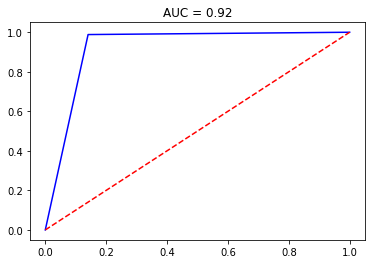

In [204]:
#Vemos si hay sobreajuste en el test df
y_pred_test = et_pca.predict(test_x)
metricas_modelos(test_y, y_pred_test)